In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

In [0]:
from pyspark.sql.functions import col

In [0]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users_sdf = spark.read.format("csv").option("delimiter", "::").option("inferSchema", "true").load("/FileStore/shared_uploads/nicolesiu1627@gmail.com/users.dat")
u_cols = users_sdf.columns
users_sdf = users_sdf.select([col(u_cols[i]).alias(unames[i]) for i in range(len(unames))])

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings_sdf = spark.read.format("csv").option("delimiter", "::").option("inferSchema", "true").load("/FileStore/shared_uploads/nicolesiu1627@gmail.com/ratings.dat")
ratings_sdf = ratings_sdf.select([col(u_cols[i]).alias(rnames[i]) for i in range(len(rnames))])

mnames = ['movie_id', 'title', 'genres']
movies_sdf = spark.read.format("csv").option("delimiter", "::").option("inferSchema", "true").load("/FileStore/shared_uploads/nicolesiu1627@gmail.com/movies.dat")
movies_sdf = movies_sdf.select([col(u_cols[i]).alias(mnames[i]) for i in range(len(mnames))])

In [0]:
data_sdf = ratings_sdf.join(users_sdf, ["user_id"]).join(movies_sdf, ["movie_id"])

In [0]:
data_sdf.show()

+--------+-------+------+---------+------+---+----------+-----+--------------------+--------------------+
|movie_id|user_id|rating|timestamp|gender|age|occupation|  zip|               title|              genres|
+--------+-------+------+---------+------+---+----------+-----+--------------------+--------------------+
|    1193|      1|     5|978300760|     F|  1|        10|48067|One Flew Over the...|               Drama|
|     661|      1|     3|978302109|     F|  1|        10|48067|James and the Gia...|Animation|Childre...|
|     914|      1|     3|978301968|     F|  1|        10|48067| My Fair Lady (1964)|     Musical|Romance|
|    3408|      1|     4|978300275|     F|  1|        10|48067|Erin Brockovich (...|               Drama|
|    2355|      1|     5|978824291|     F|  1|        10|48067|Bug's Life, A (1998)|Animation|Childre...|
|    1197|      1|     3|978302268|     F|  1|        10|48067|Princess Bride, T...|Action|Adventure|...|
|    1287|      1|     5|978302039|     F|  1|

## Data Transformation

In [0]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [0]:
from pyspark.sql.functions import udf
from pyspark.sql.functions import split, explode



#split = udf(lambda x: x.split('|'))
df1 = data_sdf.select(data_sdf.movie_id, data_sdf.user_id, data_sdf.rating,data_sdf.timestamp, data_sdf.gender, data_sdf.age, data_sdf.occupation, data_sdf.title, split(data_sdf.genres,"[|]"))
df2=df1.withColumnRenamed("split(genres, [|], -1)", "genres")
df2.show()
# df.select(df.name,explode(df.knownLanguages))

+--------+-------+------+---------+------+---+----------+--------------------+--------------------+
|movie_id|user_id|rating|timestamp|gender|age|occupation|               title|              genres|
+--------+-------+------+---------+------+---+----------+--------------------+--------------------+
|    1193|      1|     5|978300760|     F|  1|        10|One Flew Over the...|             [Drama]|
|     661|      1|     3|978302109|     F|  1|        10|James and the Gia...|[Animation, Child...|
|     914|      1|     3|978301968|     F|  1|        10| My Fair Lady (1964)|  [Musical, Romance]|
|    3408|      1|     4|978300275|     F|  1|        10|Erin Brockovich (...|             [Drama]|
|    2355|      1|     5|978824291|     F|  1|        10|Bug's Life, A (1998)|[Animation, Child...|
|    1197|      1|     3|978302268|     F|  1|        10|Princess Bride, T...|[Action, Adventur...|
|    1287|      1|     5|978302039|     F|  1|        10|      Ben-Hur (1959)|[Action, Adventur...|


In [0]:
from pyspark.sql.functions import explode
df_exploded = df2.select(df2.movie_id, df2.user_id, df2.rating,df2.timestamp, df2.gender, df2.age, df2.occupation, df2.title,explode(df2.genres)).withColumnRenamed('col','genres')
df_exploded.printSchema()
df_exploded.show()

root
 |-- movie_id: integer (nullable = true)
 |-- user_id: integer (nullable = true)
 |-- rating: integer (nullable = true)
 |-- timestamp: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- occupation: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- genres: string (nullable = false)

+--------+-------+------+---------+------+---+----------+--------------------+----------+
|movie_id|user_id|rating|timestamp|gender|age|occupation|               title|    genres|
+--------+-------+------+---------+------+---+----------+--------------------+----------+
|    1193|      1|     5|978300760|     F|  1|        10|One Flew Over the...|     Drama|
|     661|      1|     3|978302109|     F|  1|        10|James and the Gia...| Animation|
|     661|      1|     3|978302109|     F|  1|        10|James and the Gia...|Children's|
|     661|      1|     3|978302109|     F|  1|        10|James and the Gia...|   Musical|
|     914

In [0]:
#create a dataframe version
pdf_exploded = df_exploded.toPandas()
pdf_exploded

,movie_id,user_id,rating,timestamp,gender,age,occupation,title,genres
0,1193,1,5,978300760,F,1,10,One Flew Over the Cuckoo's Nest (1975),Drama
1,661,1,3,978302109,F,1,10,James and the Giant Peach (1996),Animation
2,661,1,3,978302109,F,1,10,James and the Giant Peach (1996),Children's
3,661,1,3,978302109,F,1,10,James and the Giant Peach (1996),Musical
4,914,1,3,978301968,F,1,10,My Fair Lady (1964),Musical
...,...,...,...,...,...,...,...,...,...
2101810,1096,6040,4,956715648,M,25,6,Sophie's Choice (1982),Drama
2101811,1097,6040,4,956715569,M,25,6,E.T. the Extra-Terrestrial (1982),Children's
2101812,1097,6040,4,956715569,M,25,6,E.T. the Extra-Terrestrial (1982),Drama
2101813,1097,6040,4,956715569,M,25,6,E.T. the Extra-Terrestrial (1982),Fantasy


## Explore the dataset

In [0]:
df2.describe().show()

+-------+------------------+------------------+------------------+--------------------+-------+------------------+-----------------+--------------------+
|summary|          movie_id|           user_id|            rating|           timestamp| gender|               age|       occupation|               title|
+-------+------------------+------------------+------------------+--------------------+-------+------------------+-----------------+--------------------+
|  count|           1000209|           1000209|           1000209|             1000209|1000209|           1000209|          1000209|             1000209|
|   mean|1865.5398981612843| 3024.512347919285| 3.581564453029317| 9.722436954046655E8|   null| 29.73831369243828|8.036138447064564|                null|
| stddev|1096.0406894572482|1728.4126948999715|1.1171018453732606|1.2152558939916052E7|   null|11.751982567744198| 6.53133575951789|                null|
|    min|                 1|                 1|                 1|          

In [0]:
# Top 10 movies in terms of views count
most_popular = df2.groupby('title').agg(count('user_id')).withColumnRenamed("count(user_id)", "views_count")

most_popular.sort(desc('views_count')).show(10, truncate = False)

+-----------------------------------------------------+-----------+
|title                                                |views_count|
+-----------------------------------------------------+-----------+
|American Beauty (1999)                               |3428       |
|Star Wars: Episode IV - A New Hope (1977)            |2991       |
|Star Wars: Episode V - The Empire Strikes Back (1980)|2990       |
|Star Wars: Episode VI - Return of the Jedi (1983)    |2883       |
|Jurassic Park (1993)                                 |2672       |
|Saving Private Ryan (1998)                           |2653       |
|Terminator 2: Judgment Day (1991)                    |2649       |
|Matrix, The (1999)                                   |2590       |
|Back to the Future (1985)                            |2583       |
|Silence of the Lambs, The (1991)                     |2578       |
+-----------------------------------------------------+-----------+
only showing top 10 rows



In [0]:
# Top 10 least popular movies
most_popular.sort(most_popular.views_count.asc()).show(10, truncate = False)

+------------------------------+-----------+
|title                         |views_count|
+------------------------------+-----------+
|Hungarian Fairy Tale, A (1987)|1          |
|Scorta, La (1993)             |1          |
|Small Faces (1995)            |1          |
|Running Free (2000)           |1          |
|Bloody Child, The (1996)      |1          |
|Bat Whispers, The (1930)      |1          |
|Diebinnen (1995)              |1          |
|Loves of Carmen, The (1948)   |1          |
|Low Life, The (1994)          |1          |
|Telling You (1998)            |1          |
+------------------------------+-----------+
only showing top 10 rows



In [0]:
# Top 10 movies in terms of highest average ratings
highest_rate = df2.groupby('title').agg({'rating':'mean'}).withColumnRenamed("avg(rating)", "average_rating")
highest_rate.sort(desc('average_rating')).show(10, truncate = False)

+-----------------------------------------+--------------+
|title                                    |average_rating|
+-----------------------------------------+--------------+
|Gate of Heavenly Peace, The (1995)       |5.0           |
|Baby, The (1973)                         |5.0           |
|Schlafes Bruder (Brother of Sleep) (1995)|5.0           |
|Bittersweet Motel (2000)                 |5.0           |
|Follow the Bitch (1998)                  |5.0           |
|Ulysses (Ulisse) (1954)                  |5.0           |
|Smashing Time (1967)                     |5.0           |
|Song of Freedom (1936)                   |5.0           |
|Lured (1947)                             |5.0           |
|One Little Indian (1973)                 |5.0           |
+-----------------------------------------+--------------+
only showing top 10 rows



In [0]:
# Bottom 10 movies with lowest ratings
highest_rate.sort(asc('average_rating')).show(10, truncate = False)

+----------------------------------------------------------+--------------+
|title                                                     |average_rating|
+----------------------------------------------------------+--------------+
|Windows (1980)                                            |1.0           |
|Terror in a Texas Town (1958)                             |1.0           |
|Shadows (Cienie) (1988)                                   |1.0           |
|Little Indian, Big City (Un indien dans la ville) (1994)  |1.0           |
|Santa with Muscles (1996)                                 |1.0           |
|Low Life, The (1994)                                      |1.0           |
|Wirey Spindell (1999)                                     |1.0           |
|Venice/Venice (1992)                                      |1.0           |
|Torso (Corpi Presentano Tracce di Violenza Carnale) (1973)|1.0           |
|Diebinnen (1995)                                          |1.0           |
+-----------

In [0]:
# joining the most_popular and highest_rate tables
joint = most_popular.join(highest_rate, "title")
joint.sort(desc('views_count')).show(10, truncate = False)

+-----------------------------------------------------+-----------+------------------+
|title                                                |views_count|average_rating    |
+-----------------------------------------------------+-----------+------------------+
|American Beauty (1999)                               |3428       |4.3173862310385065|
|Star Wars: Episode IV - A New Hope (1977)            |2991       |4.453694416583082 |
|Star Wars: Episode V - The Empire Strikes Back (1980)|2990       |4.292976588628763 |
|Star Wars: Episode VI - Return of the Jedi (1983)    |2883       |4.022892819979188 |
|Jurassic Park (1993)                                 |2672       |3.7638473053892216|
|Saving Private Ryan (1998)                           |2653       |4.337353938937053 |
|Terminator 2: Judgment Day (1991)                    |2649       |4.058512646281616 |
|Matrix, The (1999)                                   |2590       |4.315830115830116 |
|Back to the Future (1985)                 

In [0]:
joint.describe().show()

+-------+--------------------+------------------+------------------+
|summary|               title|       views_count|    average_rating|
+-------+--------------------+------------------+------------------+
|  count|                3706|              3706|              3706|
|   mean|                null|269.88909875876953| 3.238892177910899|
| stddev|                null| 384.0478375720256|0.6729247440986259|
|    min|$1,000,000 Duck (...|                 1|               1.0|
|    max|     eXistenZ (1999)|              3428|               5.0|
+-------+--------------------+------------------+------------------+



In [0]:
joint.filter(joint.views_count>300).sort(desc('average_rating')).show(10,truncate = False)

+-------------------------------------------------------------------+-----------+-----------------+
|title                                                              |views_count|average_rating   |
+-------------------------------------------------------------------+-----------+-----------------+
|Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)|628        |4.560509554140127|
|Shawshank Redemption, The (1994)                                   |2227       |4.554557700942973|
|Godfather, The (1972)                                              |2223       |4.524966261808367|
|Close Shave, A (1995)                                              |657        |4.52054794520548 |
|Usual Suspects, The (1995)                                         |1783       |4.517106001121705|
|Schindler's List (1993)                                            |2304       |4.510416666666667|
|Wrong Trousers, The (1993)                                         |882        |4.507936507936508|


In [0]:
joint.filter(joint.views_count>1000).sort(desc('average_rating')).show(10,truncate = False)

+---------------------------------------------------------------------------+-----------+------------------+
|title                                                                      |views_count|average_rating    |
+---------------------------------------------------------------------------+-----------+------------------+
|Shawshank Redemption, The (1994)                                           |2227       |4.554557700942973 |
|Godfather, The (1972)                                                      |2223       |4.524966261808367 |
|Usual Suspects, The (1995)                                                 |1783       |4.517106001121705 |
|Schindler's List (1993)                                                    |2304       |4.510416666666667 |
|Raiders of the Lost Ark (1981)                                             |2514       |4.477724741447892 |
|Rear Window (1954)                                                         |1050       |4.476190476190476 |
|Star Wars: Episode

In [0]:
joint.filter(joint.views_count>1000).sort(asc('average_rating')).show(10,truncate = False)

+-------------------------------------+-----------+------------------+
|title                                |views_count|average_rating    |
+-------------------------------------+-----------+------------------+
|Mars Attacks! (1996)                 |1074       |2.9003724394785846|
|Honey, I Shrunk the Kids (1989)      |1045       |2.9330143540669855|
|Batman Returns (1992)                |1031       |2.9767216294859358|
|Arachnophobia (1990)                 |1367       |3.0029261155815656|
|Blair Witch Project, The (1999)      |1237       |3.0315278900565885|
|Lost World: Jurassic Park, The (1997)|1255       |3.036653386454183 |
|Starship Troopers (1997)             |1163       |3.1332760103181427|
|Twister (1996)                       |1110       |3.1738738738738737|
|Armageddon (1998)                    |1110       |3.191891891891892 |
|Mission: Impossible 2 (2000)         |1313       |3.1957349581111956|
+-------------------------------------+-----------+------------------+
only s

## To Dataframe

In [0]:
pd = df2.toPandas()
pd

,movie_id,user_id,rating,timestamp,gender,age,occupation,title,genres
0,1193,1,5,978300760,F,1,10,One Flew Over the Cuckoo's Nest (1975),[Drama]
1,661,1,3,978302109,F,1,10,James and the Giant Peach (1996),"[Animation, Children's, Musical]"
2,914,1,3,978301968,F,1,10,My Fair Lady (1964),"[Musical, Romance]"
3,3408,1,4,978300275,F,1,10,Erin Brockovich (2000),[Drama]
4,2355,1,5,978824291,F,1,10,"Bug's Life, A (1998)","[Animation, Children's, Comedy]"
...,...,...,...,...,...,...,...,...,...
1000204,1091,6040,1,956716541,M,25,6,Weekend at Bernie's (1989),[Comedy]
1000205,1094,6040,5,956704887,M,25,6,"Crying Game, The (1992)","[Drama, Romance, War]"
1000206,562,6040,5,956704746,M,25,6,Welcome to the Dollhouse (1995),"[Comedy, Drama]"
1000207,1096,6040,4,956715648,M,25,6,Sophie's Choice (1982),[Drama]


In [0]:
pd_exploded = df_exploded.toPandas()
pd_exploded

,movie_id,user_id,rating,timestamp,gender,age,occupation,title,genres
0,1193,1,5,978300760,F,1,10,One Flew Over the Cuckoo's Nest (1975),Drama
1,661,1,3,978302109,F,1,10,James and the Giant Peach (1996),Animation
2,661,1,3,978302109,F,1,10,James and the Giant Peach (1996),Children's
3,661,1,3,978302109,F,1,10,James and the Giant Peach (1996),Musical
4,914,1,3,978301968,F,1,10,My Fair Lady (1964),Musical
...,...,...,...,...,...,...,...,...,...
2101810,1096,6040,4,956715648,M,25,6,Sophie's Choice (1982),Drama
2101811,1097,6040,4,956715569,M,25,6,E.T. the Extra-Terrestrial (1982),Children's
2101812,1097,6040,4,956715569,M,25,6,E.T. the Extra-Terrestrial (1982),Drama
2101813,1097,6040,4,956715569,M,25,6,E.T. the Extra-Terrestrial (1982),Fantasy


## Visualizations

In [0]:
import seaborn as sns

In [0]:
#from datetime import datetime
#pd["timestamp"] = pd.timestamp.apply(lambda x: datetime.fromtimestamp(x / 1e3))
#pd_exploded["timestamp"] = pd_exploded.timestamp.apply(lambda x: datetime.fromtimestamp(x / 1e3))

In [0]:
#pd['timestamp']= pd.timestamp.dt.year
#pd_exploded['timestamp']= pd_exploded.timestamp.dt.year

In [0]:
pd

,movie_id,user_id,rating,timestamp,gender,age,occupation,title,genres
0,1193,1,5,978300760,F,1,10,One Flew Over the Cuckoo's Nest (1975),[Drama]
1,661,1,3,978302109,F,1,10,James and the Giant Peach (1996),"[Animation, Children's, Musical]"
2,914,1,3,978301968,F,1,10,My Fair Lady (1964),"[Musical, Romance]"
3,3408,1,4,978300275,F,1,10,Erin Brockovich (2000),[Drama]
4,2355,1,5,978824291,F,1,10,"Bug's Life, A (1998)","[Animation, Children's, Comedy]"
...,...,...,...,...,...,...,...,...,...
1000204,1091,6040,1,956716541,M,25,6,Weekend at Bernie's (1989),[Comedy]
1000205,1094,6040,5,956704887,M,25,6,"Crying Game, The (1992)","[Drama, Romance, War]"
1000206,562,6040,5,956704746,M,25,6,Welcome to the Dollhouse (1995),"[Comedy, Drama]"
1000207,1096,6040,4,956715648,M,25,6,Sophie's Choice (1982),[Drama]


In [0]:
pd_exploded

,movie_id,user_id,rating,timestamp,gender,age,occupation,title,genres
0,1193,1,5,978300760,F,1,10,One Flew Over the Cuckoo's Nest (1975),Drama
1,661,1,3,978302109,F,1,10,James and the Giant Peach (1996),Animation
2,661,1,3,978302109,F,1,10,James and the Giant Peach (1996),Children's
3,661,1,3,978302109,F,1,10,James and the Giant Peach (1996),Musical
4,914,1,3,978301968,F,1,10,My Fair Lady (1964),Musical
...,...,...,...,...,...,...,...,...,...
2101810,1096,6040,4,956715648,M,25,6,Sophie's Choice (1982),Drama
2101811,1097,6040,4,956715569,M,25,6,E.T. the Extra-Terrestrial (1982),Children's
2101812,1097,6040,4,956715569,M,25,6,E.T. the Extra-Terrestrial (1982),Drama
2101813,1097,6040,4,956715569,M,25,6,E.T. the Extra-Terrestrial (1982),Fantasy


In [0]:
genres_count = pd_exploded[['genres','movie_id']].groupby(['genres']).count().sort_values(by = 'movie_id', ascending = False)
genres_count

Out[56]: 18

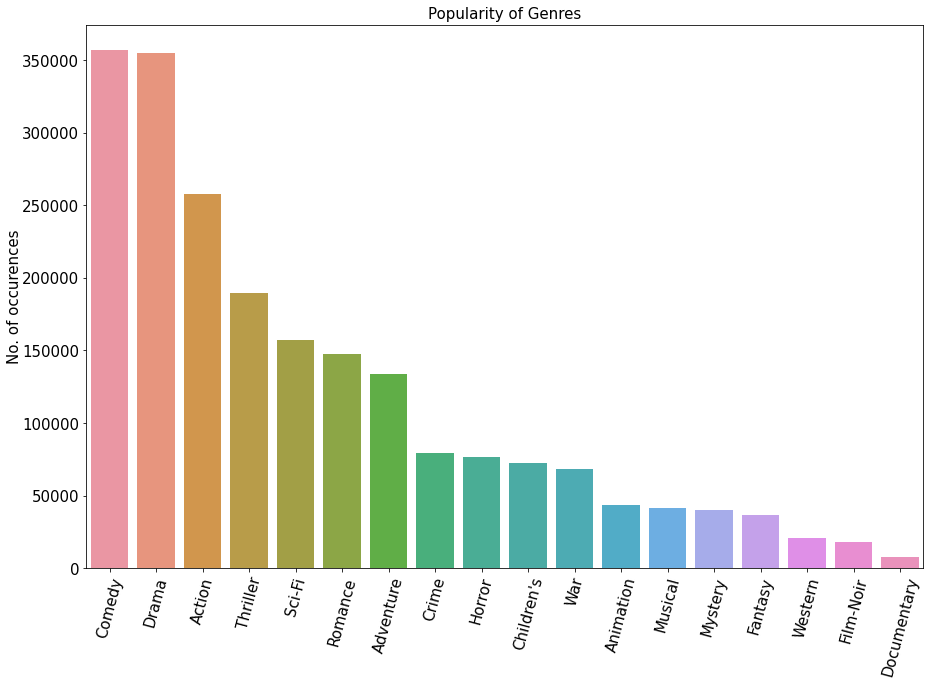

In [0]:
fig = plt.figure(1, figsize=(15,10))
plt.ylabel("No. of occurences", fontsize = 15, labelpad = 0);
plt.title("Popularity of Genres",fontsize = 15);

sns.barplot(data=genres_count, x= list(genres_count.index), y=list(genres_count['movie_id']), );
plt.xticks(rotation=75, fontsize = 15);
plt.yticks(fontsize = 15);

In [0]:
genres_rating = pd_exploded[['genres','rating']].groupby(['genres']).mean().sort_values(by = 'rating', ascending = False)
genres_rating

,rating
genres,
Film-Noir,4.075188
Documentary,3.933123
War,3.893327
Drama,3.766332
Crime,3.708679
Animation,3.684868
Mystery,3.668102
Musical,3.665519
Western,3.637770


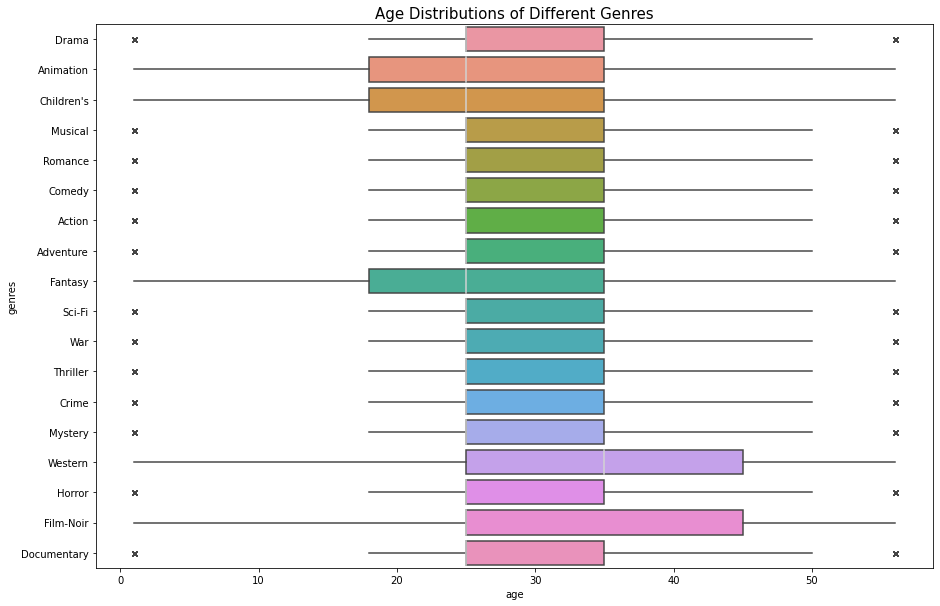

In [0]:
fig = plt.figure(1, figsize=(15,10))
plt.title("Age Distributions of Different Genres",fontsize = 15);

#colors = sns.husl_palette(n_colors=18,l=0.7)
sns.boxplot(
    data=pd_exploded, x="age", y="genres",
    #hue = "gender",
    #palette = colors,
    notch=False ,showcaps=False,
    flierprops={"marker": "x"},
    medianprops={"color": "lightgrey"},
);

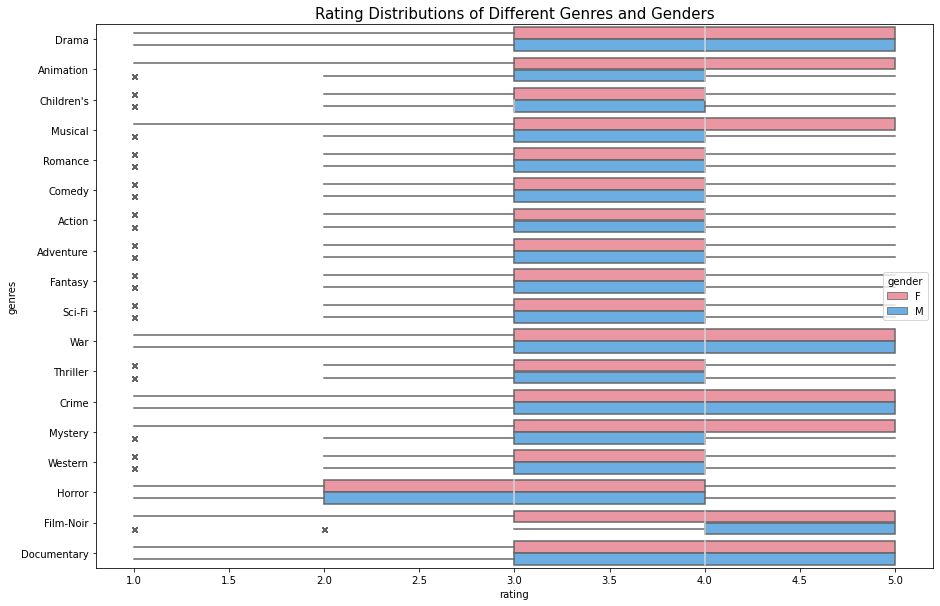

In [0]:
fig = plt.figure(1, figsize=(15,10))
plt.title("Rating Distributions of Different Genres and Genders",fontsize = 15);
#colors = sns.color_palette('tab10')[6:8]
colors = [(0.9709009234187059, 0.5326413088101082, 0.6030946551014079),(0.34973974347912157, 0.6894557513033505, 0.9647300102513904)]
sns.boxplot(
    data=pd_exploded, x="rating", y="genres",
    hue = "gender",
    palette = colors,
    notch=False ,showcaps=False,
    flierprops={"marker": "x"},
    #boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "lightgrey"},
);

In [0]:
age_dist = pd[['user_id','age']].groupby('age').count()
age_dist

,user_id
age,
1,27211
18,183536
25,395556
35,199003
45,83633
50,72490
56,38780


In [0]:
col = ["Under 18", "18-24", "25-34", "35-44","45-49","50-55","56+"]
#age_dist['age_group'] = col

In [0]:
age_dist

,user_id
age,
1,27211
18,183536
25,395556
35,199003
45,83633
50,72490
56,38780


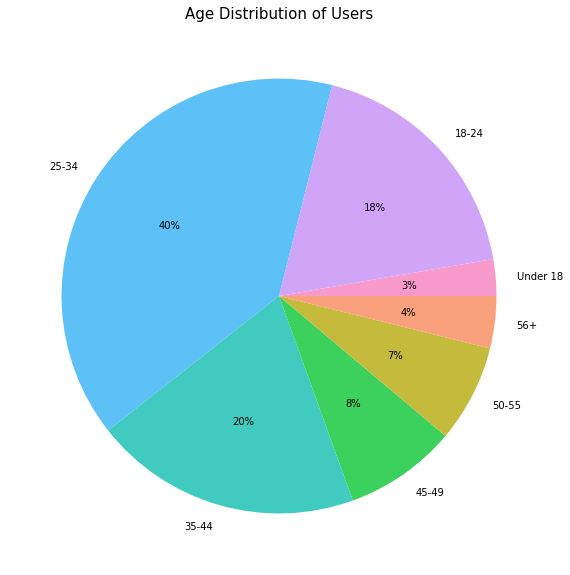

In [0]:
fig = plt.figure(1, figsize=(15,10))
plt.title("Age Distribution of Users",fontsize = 15);
colors = sns.husl_palette(n_colors=14,l=0.75)[::-2]
#create pie chart
plt.pie(age_dist['user_id'], labels = col, colors = colors, autopct='%.0f%%')
plt.show()